In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
'Pregnancies' - Number of times pregnant
'Glucose' - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
'BloodPressure' - Diastolic blood pressure (mm Hg)
'SkinThickness' - Triceps skin fold thickness (mm)
'Insulin' - 2-Hour serum insulin (mu U/ml)
'BMI' - Body mass index (weight in kg/(height in m)^2)
'DiabetesPedigreeFunction' - Diabetes pedigree function
'Age' - Age (years) (21+)
'Outcome' - Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [5]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Data Preprocessing - Imputing Mean Values

In [6]:
print("number of rows in glucose_conc variable having 0 value: {0}".format(len(X.loc[X['Glucose'] == 0])))
print("number of rows in BP variable having 0 value: {0}".format(len(X.loc[X['BloodPressure'] == 0])))
print("number of rows in insulin variable having 0 value: {0}".format(len(X.loc[X['Insulin'] == 0])))
print("number of rows in bmi variable having 0 value: {0}".format(len(X.loc[X['BMI'] == 0])))
print("number of rows in diab_pred variable having 0 value: {0}".format(len(X.loc[X['DiabetesPedigreeFunction'] == 0])))
print("number of rows in age variable having 0 value: {0}".format(len(X.loc[X['Age'] == 0])))
print("number of rows in skin variable having 0 value: {0}".format(len(X.loc[X['SkinThickness'] == 0])))

number of rows in glucose_conc variable having 0 value: 5
number of rows in BP variable having 0 value: 35
number of rows in insulin variable having 0 value: 374
number of rows in bmi variable having 0 value: 11
number of rows in diab_pred variable having 0 value: 0
number of rows in age variable having 0 value: 0
number of rows in skin variable having 0 value: 227


In [7]:
from sklearn.impute import SimpleImputer 

imputer=SimpleImputer(missing_values=0, strategy='mean')

imputer=imputer.fit(X)
X=imputer.transform(X)

In [8]:
X = pd.DataFrame({'Pregnancies': X[:, 0],'Glucose': X[:, 1], 'BloodPressure': X[:, 2], 'SkinThickness': X[:, 3], 'Insulin': X[:, 4],
       'BMI': X[:, 5], 'DiabetesPedigreeFunction': X[:, 6], 'Age': X[:, 7]})

In [9]:
print("number of rows in glucose_conc variable having 0 value: {0}".format(len(X.loc[X['Glucose'] == 0])))
print("number of rows in BP variable having 0 value: {0}".format(len(X.loc[X['BloodPressure'] == 0])))
print("number of rows in insulin variable having 0 value: {0}".format(len(X.loc[X['Insulin'] == 0])))
print("number of rows in bmi variable having 0 value: {0}".format(len(X.loc[X['BMI'] == 0])))
print("number of rows in diab_pred variable having 0 value: {0}".format(len(X.loc[X['DiabetesPedigreeFunction'] == 0])))
print("number of rows in age variable having 0 value: {0}".format(len(X.loc[X['Age'] == 0])))
print("number of rows in skin variable having 0 value: {0}".format(len(X.loc[X['SkinThickness'] == 0])))

number of rows in glucose_conc variable having 0 value: 0
number of rows in BP variable having 0 value: 0
number of rows in insulin variable having 0 value: 0
number of rows in bmi variable having 0 value: 0
number of rows in diab_pred variable having 0 value: 0
number of rows in age variable having 0 value: 0
number of rows in skin variable having 0 value: 0


In [170]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify=y)

In [168]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

# Feature Scaling

In [11]:
# importing scaling modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Standardization

In [12]:
scale = StandardScaler().fit(X_train)
X_train_sc = scale.transform(X_train)
X_test_sc = scale.transform(X_test)

In [13]:
X_train_sc = pd.DataFrame({'Pregnancies': X_train_sc[:, 0], 'Glucose': X_train_sc[:, 1], 'BloodPressure': X_train_sc[:, 2], 'SkinThickness': X_train_sc[:, 3], 'Insulin': X_train_sc[:, 4],
       'BMI': X_train_sc[:, 5], 'DiabetesPedigreeFunction': X_train_sc[:, 6], 'Age': X_train_sc[:, 7]})

In [14]:
X_test_sc = pd.DataFrame({'Pregnancies': X_test_sc[:, 0], 'Glucose': X_test_sc[:, 1], 'BloodPressure': X_test_sc[:, 2], 'SkinThickness': X_test_sc[:, 3], 'Insulin': X_test_sc[:, 4],
       'BMI': X_test_sc[:, 5], 'DiabetesPedigreeFunction': X_test_sc[:, 6], 'Age': X_test_sc[:, 7]})

# Logistic Regression Classifier after Standardization

In [17]:
from sklearn.linear_model import LogisticRegression

logregs = LogisticRegression()
logregs.fit(X_train_sc, y_train)
y_pred_st = logregs.predict(X_test_sc)
print("Accuracy for Logistic Regression Classifier after Standardization is :",round(metrics.accuracy_score(y_test, y_pred_st)*100,2),"%")

Accuracy for Logistic Regression Classifier after Standardization is : 82.47 %


# Normalization

In [18]:
norm = MinMaxScaler().fit(X_train)
X_train_nm = norm.transform(X_train)
X_test_nm = norm.transform(X_test)

In [19]:
X_train_nm = pd.DataFrame({'Pregnancies': X_train_nm[:, 0], 'Glucose': X_train_nm[:, 1], 'BloodPressure': X_train_nm[:, 2], 'SkinThickness': X_train_nm[:, 3], 'Insulin': X_train_nm[:, 4],
       'BMI': X_train_nm[:, 5], 'DiabetesPedigreeFunction': X_train_nm[:, 6], 'Age': X_train_nm[:, 7]})

In [20]:
X_test_nm = pd.DataFrame({'Pregnancies': X_test_nm[:, 0], 'Glucose': X_test_nm[:, 1], 'BloodPressure': X_test_nm[:, 2], 'SkinThickness': X_test_nm[:, 3], 'Insulin': X_test_nm[:, 4],
       'BMI': X_test_nm[:, 5], 'DiabetesPedigreeFunction': X_test_nm[:, 6], 'Age': X_test_nm[:, 7]})

# Logistic Regression Classifier after Normalization

In [21]:
from sklearn.linear_model import LogisticRegression

logregn = LogisticRegression()
logregn.fit(X_train_nm, y_train)
y_pred_nm = logregn.predict(X_test_nm)
print("Accuracy for Logistic Regression Classifier after Normalization is :",round(metrics.accuracy_score(y_test, y_pred_nm)*100,2),"%")

Accuracy for Logistic Regression Classifier after Normalization is : 80.52 %


# Logistic Regression - Baseline Model

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test, y_pred_lr)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 82.47 %


# Logisitc Regression with KFold Cross Validation

In [23]:
# Kfold Cross Validation

from sklearn.model_selection import cross_val_score

lrk_classifier = LogisticRegression()
lrk_score = cross_val_score(lrk_classifier,X,y,cv=10)
lrk_score

array([0.76623377, 0.80519481, 0.79220779, 0.7012987 , 0.72727273,
       0.77922078, 0.80519481, 0.80519481, 0.73684211, 0.82894737])

In [25]:
np.mean(lrk_score)

0.7747607655502392

# Logisitc Regression with Stratified KFold Cross Validation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

for train_index, test_index in skf.split(X,y):
    
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

    logreg_sk = LogisticRegression()
    logreg_sk.fit(Xtrain, ytrain)
    y_pred_lr_sk = logreg_sk.predict(Xtest)
    print("Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is :",round(metrics.accuracy_score(ytest, y_pred_lr_sk)*100,2),"%")

Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 76.62 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 80.52 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 79.22 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 70.13 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 72.73 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 77.92 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 80.52 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 80.52 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 73.68 %
Accuracy for Logistic Regression Classifier with Stratified KFold Cross Validation is : 82.89 %


# Handling the Imbalanced Dataset

In [27]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
We can observe that the Target Variable is highly imbalanced. 
The number of women that don't have diabetes is significantly higher than the number of women who have diabetes.
With this dataset the Machine Learning Algorithms are going to be biased towards non-diabetic women.

# Undersampling

In [98]:
from imblearn.under_sampling import RandomUnderSampler

In [99]:
X.shape, y.shape

((768, 8), (768,))

In [100]:
under_samp = RandomUnderSampler() 
X_under, y_under = under_samp.fit_resample(X, y)

In [101]:
X_under.shape, y_under.shape

((536, 8), (536,))

In [102]:
y_under.value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size = 0.2, random_state = 10, stratify=y_under)

# Implementing Logistic Regression after UnderSampling

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_under = LogisticRegression()
logreg_under.fit(X_train_u, y_train_u)
y_pred_lr_u = logreg_under.predict(X_test_u)
print("Accuracy for Logistic Regression Classifier after undersampling is :",round(metrics.accuracy_score(y_test_u, y_pred_lr_u)*100,2),"%")

Accuracy for Logistic Regression Classifier after undersampling is : 68.52 %


In [105]:
scaleu= StandardScaler().fit(X_train_u)
X_train_scsu= scaleu.transform(X_train_u)
X_test_scsu= scaleu.transform(X_test_u)

In [106]:
X_train_scsu = pd.DataFrame({'Pregnancies': X_train_scsu[:, 0], 'Glucose': X_train_scsu[:, 1], 'BloodPressure': X_train_scsu[:, 2], 'SkinThickness': X_train_scsu[:, 3], 'Insulin': X_train_scsu[:, 4],
       'BMI': X_train_scsu[:, 5], 'DiabetesPedigreeFunction': X_train_scsu[:, 6], 'Age': X_train_scsu[:, 7]})

In [107]:
X_test_scsu = pd.DataFrame({'Pregnancies': X_test_scsu[:, 0], 'Glucose': X_test_scsu[:, 1], 'BloodPressure': X_test_scsu[:, 2], 'SkinThickness': X_test_scsu[:, 3], 'Insulin': X_test_scsu[:, 4],
       'BMI': X_test_scsu[:, 5], 'DiabetesPedigreeFunction': X_test_scsu[:, 6], 'Age': X_test_scsu[:, 7]})

# Logistic Regression after UnderSampling with Standardization

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfu = LogisticRegression()
clfu.fit(X_train_scsu, y_train_u)
y_predu = clfu.predict(X_test_scsu)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test_u, y_predu)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 70.37 %


In [109]:
normu = MinMaxScaler().fit(X_train_u)

In [110]:
X_train_nmsu = normu.transform(X_train_u)
X_test_nmsu = normu.transform(X_test_u)

In [111]:
X_train_nmsu = pd.DataFrame({'Pregnancies': X_train_nmsu[:, 0], 'Glucose': X_train_nmsu[:, 1], 'BloodPressure': X_train_nmsu[:, 2], 'SkinThickness': X_train_nmsu[:, 3], 'Insulin': X_train_nmsu[:, 4],
       'BMI': X_train_nmsu[:, 5], 'DiabetesPedigreeFunction': X_train_nmsu[:, 6], 'Age': X_train_nmsu[:, 7]})


In [112]:
X_test_nmsu = pd.DataFrame({'Pregnancies': X_test_nmsu[:, 0], 'Glucose': X_test_nmsu[:, 1], 'BloodPressure': X_test_nmsu[:, 2], 'SkinThickness': X_test_nmsu[:, 3], 'Insulin': X_test_nmsu[:, 4],
       'BMI': X_test_nmsu[:, 5], 'DiabetesPedigreeFunction': X_test_nmsu[:, 6], 'Age': X_test_nmsu[:, 7]})


# Logistic Regression after UnderSampling with Normalization

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfu1 = LogisticRegression()
clfu1.fit(X_train_nmsu, y_train_u)
y_predu1 = clfu1.predict(X_test_nmsu)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test_u, y_predu1)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 72.22 %


# Over Sampling

In [114]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler()
X_over, y_over = over.fit_resample(X, y)

In [115]:
X_over.shape, y_over.shape

((1000, 8), (1000,))

In [116]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size = 0.2, random_state = 10, stratify=y_over)

In [117]:
logreg_over = LogisticRegression()
logreg_over.fit(X_train_o, y_train_o)
y_pred_lr_o = logreg_over.predict(X_test_o)
print("Accuracy for Logistic Regression Classifier after oversampling is :",round(metrics.accuracy_score(y_test_o, y_pred_lr_o)*100,2),"%")

Accuracy for Logistic Regression Classifier after oversampling is : 71.0 %


In [118]:
scale21= StandardScaler().fit(X_train_o)
X_train_scs21= scale21.transform(X_train_o)
X_test_scs21= scale21.transform(X_test_o)

In [119]:
X_train_scs21 = pd.DataFrame({'Pregnancies': X_train_scs21[:, 0], 'Glucose': X_train_scs21[:, 1], 'BloodPressure': X_train_scs21[:, 2], 'SkinThickness': X_train_scs21[:, 3], 'Insulin': X_train_scs21[:, 4],
       'BMI': X_train_scs21[:, 5], 'DiabetesPedigreeFunction': X_train_scs21[:, 6], 'Age': X_train_scs21[:, 7]})

In [120]:
X_test_scs21 = pd.DataFrame({'Pregnancies': X_test_scs21[:, 0], 'Glucose': X_test_scs21[:, 1], 'BloodPressure': X_test_scs21[:, 2], 'SkinThickness': X_test_scs21[:, 3], 'Insulin': X_test_scs21[:, 4],
       'BMI': X_test_scs21[:, 5], 'DiabetesPedigreeFunction': X_test_scs21[:, 6], 'Age': X_test_scs21[:, 7]})


# Logistic Regression after OverSampling with Standardization

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfoo = LogisticRegression()
clfoo.fit(X_train_scs21, y_train_o)
y_predoo = clfoo.predict(X_test_scs21)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test_o, y_predoo)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 72.5 %


In [125]:
normo = MinMaxScaler().fit(X_train_o)
X_train_nms2 = normo.transform(X_train_o)
X_test_nms2 = normo.transform(X_test_o)

In [126]:
X_train_nms2 = pd.DataFrame({'Pregnancies': X_train_nms2[:, 0], 'Glucose': X_train_nms2[:, 1], 'BloodPressure': X_train_nms2[:, 2], 'SkinThickness': X_train_nms2[:, 3], 'Insulin': X_train_nms2[:, 4],
       'BMI': X_train_nms2[:, 5], 'DiabetesPedigreeFunction': X_train_nms2[:, 6], 'Age': X_train_nms2[:, 7]})

In [127]:
X_test_nms2 = pd.DataFrame({'Pregnancies': X_test_nms2[:, 0], 'Glucose': X_test_nms2[:, 1], 'BloodPressure': X_test_nms2[:, 2], 'SkinThickness': X_test_nms2[:, 3], 'Insulin': X_test_nms2[:, 4],
       'BMI': X_test_nms2[:, 5], 'DiabetesPedigreeFunction': X_test_nms2[:, 6], 'Age': X_test_nms2[:, 7]})


# Logistic Regression after OverSampling with Normalization

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfoo = LogisticRegression()
clfoo.fit(X_train_nms2, y_train_o)
y_predoo = clfoo.predict(X_test_nms2)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test_o, y_predoo)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 72.0 %


# SMOTE (Synthetic Minority Over-sampling Technique)

In [130]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [131]:
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [132]:
X_oversample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,180.0,72.405184,29.15342,155.548223,43.3,0.282,41.0
1,8.0,155.0,62.000000,26.00000,495.000000,34.0,0.543,46.0
2,7.0,114.0,66.000000,29.15342,155.548223,32.8,0.258,42.0
3,1.0,109.0,58.000000,18.00000,116.000000,28.5,0.219,22.0
4,1.0,151.0,60.000000,29.15342,155.548223,26.1,0.179,22.0


# SMOTE without Feature Scaling

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfo = LogisticRegression()
clfo.fit(X_oversample, y_oversample)
y_predo = clfo.predict(X_test)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test, y_predo)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 74.03 %


In [134]:
scale2= StandardScaler().fit(X_oversample)
X_train_scs2= scale2.transform(X_oversample)
X_test_scs2= scale2.transform(X_test)

In [135]:
X_train_scs2 = pd.DataFrame({'Pregnancies': X_train_scs2[:, 0], 'Glucose': X_train_scs2[:, 1], 'BloodPressure': X_train_scs2[:, 2], 'SkinThickness': X_train_scs2[:, 3], 'Insulin': X_train_scs2[:, 4],
       'BMI': X_train_scs2[:, 5], 'DiabetesPedigreeFunction': X_train_scs2[:, 6], 'Age': X_train_scs2[:, 7]})

In [136]:
X_test_scs2 = pd.DataFrame({'Pregnancies': X_test_scs2[:, 0], 'Glucose': X_test_scs2[:, 1], 'BloodPressure': X_test_scs2[:, 2], 'SkinThickness': X_test_scs2[:, 3], 'Insulin': X_test_scs2[:, 4],
       'BMI': X_test_scs2[:, 5], 'DiabetesPedigreeFunction': X_test_scs2[:, 6], 'Age': X_test_scs2[:, 7]})

# Logistic Regression after SMOTE with Standardization

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf2 = LogisticRegression()
clf2.fit(X_train_scs2, y_oversample)
y_pred2 = clf2.predict(X_test_scs2)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test, y_pred2)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 76.62 %


In [138]:
norm2 = MinMaxScaler().fit(X_train)
X_train_nms2 = norm2.transform(X_train)
X_test_nms2 = norm2.transform(X_test)

In [139]:
X_train_nms2 = pd.DataFrame({'Pregnancies': X_train_nms2[:, 0], 'Glucose': X_train_nms2[:, 1], 'BloodPressure': X_train_nms2[:, 2], 'SkinThickness': X_train_nms2[:, 3], 'Insulin': X_train_nms2[:, 4],
       'BMI': X_train_nms2[:, 5], 'DiabetesPedigreeFunction': X_train_nms2[:, 6], 'Age': X_train_nms2[:, 7]})

In [140]:
X_test_nms2 = pd.DataFrame({'Pregnancies': X_test_nms2[:, 0], 'Glucose': X_test_nms2[:, 1], 'BloodPressure': X_test_nms2[:, 2], 'SkinThickness': X_test_nms2[:, 3], 'Insulin': X_test_nms2[:, 4],
       'BMI': X_test_nms2[:, 5], 'DiabetesPedigreeFunction': X_test_nms2[:, 6], 'Age': X_test_nms2[:, 7]})

# Logistic Regression after SMOTE with Normalization

In [141]:
from sklearn.linear_model import LogisticRegression

log2 = LogisticRegression()
log2.fit(X_train_nms2, y_train)
y_prednms2 = log2.predict(X_test_nms2)
print("Accuracy for Logistic Regression Classifier after Normalization is :",round(metrics.accuracy_score(y_test, y_prednms2)*100,2),"%")

Accuracy for Logistic Regression Classifier after Normalization is : 80.52 %


# SMOTE NC

In [143]:
from imblearn.over_sampling import SMOTENC
smotencc = SMOTENC([0],random_state = 101)
X_oversamplenc, y_oversamplenc = smotencc.fit_resample(X_train, y_train)

In [144]:
X_oversamplenc.shape, y_oversamplenc.shape

((800, 8), (800,))

# LogisticRegression after Implementing SMOTE NC 

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfc = LogisticRegression()
clfc.fit(X_oversamplenc, y_oversamplenc)
y_predc = clfc.predict(X_test)
print("Accuracy for Logistic Regression Classifier after implementing SMOTE NC  is :",round(metrics.accuracy_score(y_test, y_predc)*100,2),"%")

Accuracy for Logistic Regression Classifier after implementing SMOTE NC  is : 75.32 %


In [146]:
scalec = StandardScaler().fit(X_oversamplenc)
X_train_scc = scalec.transform(X_oversamplenc)
X_test_scc = scalec.transform(X_test)

In [147]:
X_train_scc = pd.DataFrame({'Pregnancies': X_train_scc[:, 0], 'Glucose': X_train_scc[:, 1], 'BloodPressure': X_train_scc[:, 2], 'SkinThickness': X_train_scc[:, 3], 'Insulin': X_train_scc[:, 4],
       'BMI': X_train_scc[:, 5], 'DiabetesPedigreeFunction': X_train_scc[:, 6], 'Age': X_train_scc[:, 7]})

In [148]:
X_test_scc = pd.DataFrame({'Pregnancies': X_test_scc[:, 0], 'Glucose': X_test_scc[:, 1], 'BloodPressure': X_test_scc[:, 2], 'SkinThickness': X_test_scc[:, 3], 'Insulin': X_test_scc[:, 4],
       'BMI': X_test_scc[:, 5], 'DiabetesPedigreeFunction': X_test_scc[:, 6], 'Age': X_test_scc[:, 7]})

# LogisticRegression after SMOTE NC and Scaling of data with Standarization

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfc = LogisticRegression()
clfc.fit(X_train_scc, y_oversamplenc)
y_predc = clfc.predict(X_test_scc)
print("Accuracy for Logistic Regression Classifier is :",round(metrics.accuracy_score(y_test, y_predc)*100,2),"%")

Accuracy for Logistic Regression Classifier is : 76.62 %


In [150]:
norm = MinMaxScaler().fit(X_oversamplenc)
X_train_nmc = norm.transform(X_oversamplenc)
X_test_nmc = norm.transform(X_test)

In [151]:
X_train_nmc = pd.DataFrame({'Pregnancies': X_train_nmc[:, 0], 'Glucose': X_train_nmc[:, 1], 'BloodPressure': X_train_nmc[:, 2], 'SkinThickness': X_train_nmc[:, 3], 'Insulin': X_train_nmc[:, 4],
       'BMI': X_train_nmc[:, 5], 'DiabetesPedigreeFunction': X_train_nmc[:, 6], 'Age': X_train_nmc[:, 7]})

In [152]:
X_test_nmc = pd.DataFrame({'Pregnancies': X_test_nmc[:, 0], 'Glucose': X_test_nmc[:, 1], 'BloodPressure': X_test_nmc[:, 2], 'SkinThickness': X_test_nmc[:, 3], 'Insulin': X_test_nmc[:, 4],
       'BMI': X_test_nmc[:, 5], 'DiabetesPedigreeFunction': X_test_nmc[:, 6], 'Age': X_test_nmc[:, 7]})

# LogisticRegression after SMOTE NC and Scaling of data with Normalization

In [153]:
from sklearn.linear_model import LogisticRegression

lognc = LogisticRegression()
lognc.fit(X_train_nmc, y_oversamplenc)
y_prednmc = lognc.predict(X_test_nmc)
print("Accuracy for Logistic Regression Classifier after Normalization is :",round(metrics.accuracy_score(y_test, y_prednmc)*100,2),"%")

Accuracy for Logistic Regression Classifier after Normalization is : 77.27 %


# ADASYN (Adaptive Synthetic Sampling)

In [154]:
from imblearn.over_sampling import ADASYN

In [155]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)

In [156]:
X_oversample_ada.shape, y_oversample_ada.shape

((779, 8), (779,))

# LogisticRegression after ADASYN

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfa = LogisticRegression()
clfa.fit(X_oversample_ada, y_oversample_ada)
y_preda = clfa.predict(X_test)
print("Accuracy for Logistic Regression Classifier after implementing ADASYN  is :",round(metrics.accuracy_score(y_test, y_preda)*100,2),"%")

Accuracy for Logistic Regression Classifier after implementing ADASYN  is : 72.08 %


In [158]:
scalea = StandardScaler().fit(X_oversample_ada)
X_train_sca = scalea.transform(X_oversample_ada)
X_test_sca = scalea.transform(X_test)

In [159]:
X_train_sca = pd.DataFrame({'Pregnancies': X_train_sca[:, 0], 'Glucose': X_train_sca[:, 1], 'BloodPressure': X_train_sca[:, 2], 'SkinThickness': X_train_sca[:, 3], 'Insulin': X_train_sca[:, 4],
       'BMI': X_train_sca[:, 5], 'DiabetesPedigreeFunction': X_train_sca[:, 6], 'Age': X_train_sca[:, 7]})

In [160]:
X_test_sca = pd.DataFrame({'Pregnancies': X_test_sca[:, 0], 'Glucose': X_test_sca[:, 1], 'BloodPressure': X_test_sca[:, 2], 'SkinThickness': X_test_sca[:, 3], 'Insulin': X_test_sca[:, 4],
       'BMI': X_test_sca[:, 5], 'DiabetesPedigreeFunction': X_test_sca[:, 6], 'Age': X_test_sca[:, 7]})

# LogisticRegression after ADASYN with Standarization

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfa1 = LogisticRegression()
clfa1.fit(X_train_sca, y_oversample_ada)
y_preda1 = clfa1.predict(X_test_sca)
print("Accuracy for Logistic Regression Classifier after implementing ADASYN with Standarization is :",round(metrics.accuracy_score(y_test, y_preda1)*100,2),"%")

Accuracy for Logistic Regression Classifier after implementing ADASYN with Standarization is : 76.62 %


In [162]:
norma = MinMaxScaler().fit(X_oversample_ada)
X_train_nma = norma.transform(X_oversample_ada)
X_test_nma = norma.transform(X_test)

In [163]:
X_train_nma = pd.DataFrame({'Pregnancies': X_train_nma[:, 0], 'Glucose': X_train_nma[:, 1], 'BloodPressure': X_train_nma[:, 2], 'SkinThickness': X_train_nma[:, 3], 'Insulin': X_train_nma[:, 4],
       'BMI': X_train_nma[:, 5], 'DiabetesPedigreeFunction': X_train_nma[:, 6], 'Age': X_train_nma[:, 7]})

In [164]:
X_test_nma = pd.DataFrame({'Pregnancies': X_test_nma[:, 0], 'Glucose': X_test_nma[:, 1], 'BloodPressure': X_test_nma[:, 2], 'SkinThickness': X_test_nma[:, 3], 'Insulin': X_test_nma[:, 4],
       'BMI': X_test_nma[:, 5], 'DiabetesPedigreeFunction': X_test_nma[:, 6], 'Age': X_test_nma[:, 7]})

# LogisticRegression after ADASYN with Normalization

In [165]:
from sklearn.linear_model import LogisticRegression

lognma2 = LogisticRegression()
lognma2.fit(X_train_nma, y_oversample_ada)
y_prednma2 = lognma2.predict(X_test_nma)
print("Accuracy for Logistic Regression Classifier after implementing ADASYN with Normalization is :",round(metrics.accuracy_score(y_test, y_prednma2)*100,2),"%")

Accuracy for Logistic Regression Classifier after implementing ADASYN with Normalization is : 75.32 %


# Feature Selection

- Plot the correlation matrix and eliminate the redundant features
- Univariate Selection: SelectKBest
- Feature Importance: ExtraTreesClassifier
- Information Gain: mutual_info_classif
- Recursive Feature Elimination

In [ ]:
Remove coorelated features i.e. redundant features as they convey
the same information. This redundant/correlated feature could also
lead to over-fitting.

# Correlation Matrix

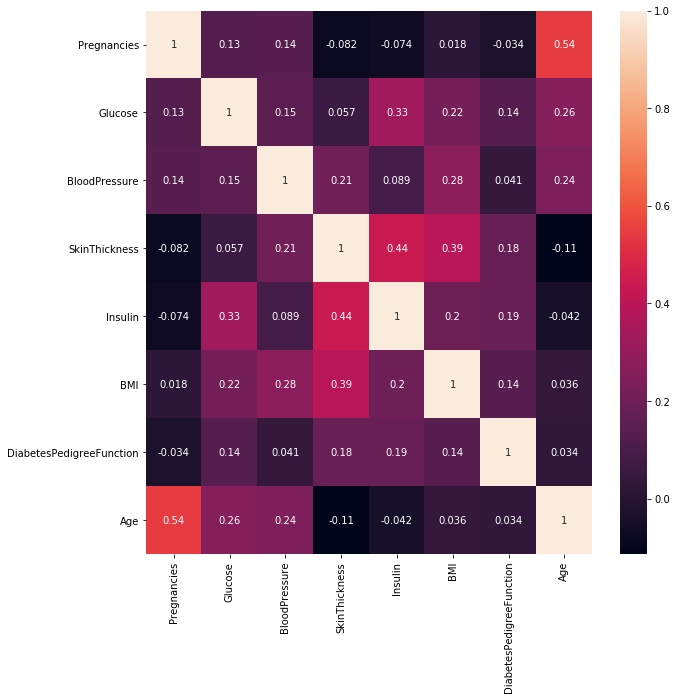

In [97]:
import seaborn as sns
corr=data.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(data[top_features].corr(),annot=True)

In [29]:
threshold=0.8

In [30]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
correlation(data.iloc[:,:-1],threshold)

set()

In [ ]:
None of the features are correlated highly to each other.
Hence it shows that we don't have any redundant data.
Hence we don't need to eliminate any features.

# Univariate Selection: SelectKBest¶

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X.shape, y.shape

((768, 8), (768,))

In [34]:
ordered_rank_features=SelectKBest(score_func=chi2,k=8)
ordered_feature=ordered_rank_features.fit(X,y)

In [35]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [36]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [37]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Pregnancies,93.112985
1,Glucose,1418.705030
2,BloodPressure,42.749956
3,SkinThickness,94.245703
4,Insulin,1638.618150
5,BMI,108.678584
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [38]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [39]:
X_new = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age']]

In [40]:
from sklearn.model_selection import train_test_split

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, test_size = 0.2, random_state = 10, stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_new = LogisticRegression()
logreg_new.fit(X_train_n, y_train_n)
y_pred_new = logreg_new.predict(X_test_n)
print("Accuracy for Logistic Regression Classifier after Univariate Feature Selection is :",round(metrics.accuracy_score(y_test_n, y_pred_new)*100,2),"%")

Accuracy for Logistic Regression Classifier after Univariate Feature Selection is : 79.22 %


# Removal of the feature 'DiabetesPedigreeFunction' resulted in lower accuracy

# Feature Importance: ExtraTreesClassifier

In [ ]:
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [43]:
print(model.feature_importances_)

[0.10991749 0.24190296 0.09368951 0.0853542  0.08412559 0.13966679
 0.11128592 0.13405753]


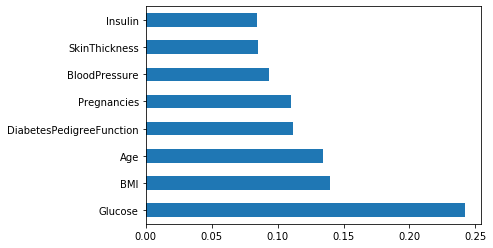

In [44]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(8).plot(kind='barh')
plt.show()

In [45]:
X_new1 = X[['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction',
       'BMI', 'Age']]

In [46]:
from sklearn.model_selection import train_test_split

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_new1, y, test_size = 0.2, random_state = 10, stratify=y)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_new1 = LogisticRegression()
logreg_new1.fit(X_train_nn, y_train_nn)
y_pred_new1 = logreg_new1.predict(X_test_nn)
print("Accuracy for Logistic Regression Classifier after Univariate Feature Selection is :",round(metrics.accuracy_score(y_test_nn, y_pred_new1)*100,2),"%")

Accuracy for Logistic Regression Classifier after Univariate Feature Selection is : 82.47 %


In [ ]:
Removal of the features 'SkinThickness' and 'Insulin' resulted resulted in higher accuracy

# Information Gain

In [48]:
from sklearn.feature_selection import mutual_info_classif

In [49]:
mutual_info=mutual_info_classif(X,y)

In [50]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

Glucose                     0.133182
BMI                         0.075422
Insulin                     0.057742
Age                         0.050120
SkinThickness               0.036775
BloodPressure               0.028901
Pregnancies                 0.022830
DiabetesPedigreeFunction    0.017267
dtype: float64

In [51]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [52]:
X_i = X[['Pregnancies', 'Glucose', 'BloodPressure','Insulin',
       'BMI', 'Age']]

In [53]:
from sklearn.model_selection import train_test_split

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size = 0.2, random_state = 10, stratify=y)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_ig = LogisticRegression()
logreg_ig.fit(X_train_i, y_train_i)
y_pred_ig = logreg_ig.predict(X_test_i)
print("Accuracy for Logistic Regression Classifier after Univariate Feature Selection is :",round(metrics.accuracy_score(y_test_i, y_pred_ig)*100,2),"%")

Accuracy for Logistic Regression Classifier after Univariate Feature Selection is : 79.87 %


# Removal of the feature 'DiabetesPedigreeFunction' and 'SkinThickness' resulted in lower accuracy, based on the Information gain

# Recursive Feature Elimination

In [ ]:
# Recursive Feature Elimination with Cross-Validation (RFECV)

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

lgc = LogisticRegression(random_state=101)
rfecv = RFECV(estimator=lgc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=101), scoring='accuracy')

In [56]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


# Optimal number of features: 8

# Accuracy obtained vs. Number of Features used

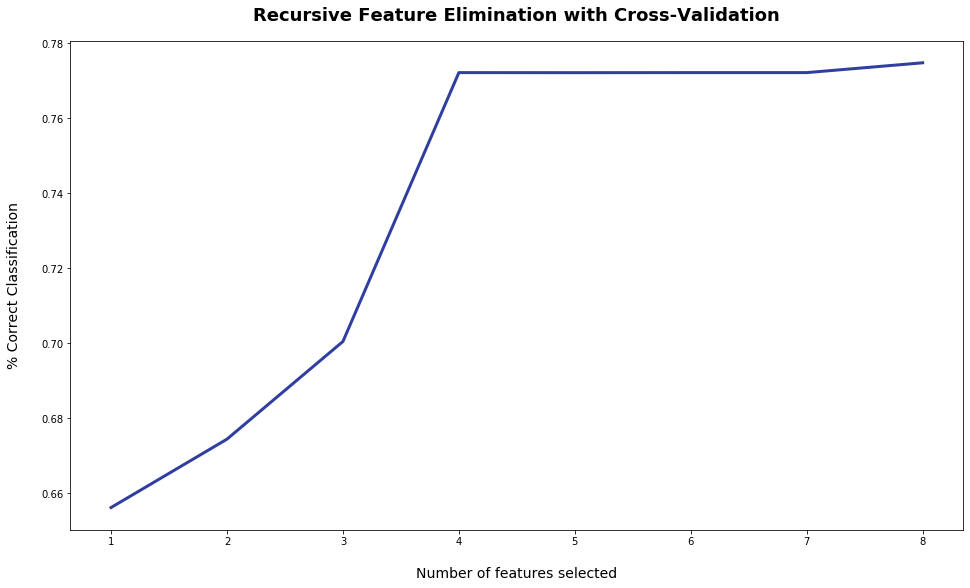

In [57]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [58]:
rfecv.grid_scores_

array([0.65623718, 0.67447027, 0.70049556, 0.77214627, 0.77212919,
       0.77214627, 0.77214627, 0.77476077])

In [59]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

# Hyperparameter Tuning

- GridSearchCV
- RandomizedSearchCV

In [60]:
from sklearn.model_selection import train_test_split

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify=y)

# GridSearchCV

In [61]:
classifier = LogisticRegression()

In [62]:
parameters = [
    {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}]

In [69]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_searchw= grid_search.fit(X_train_g, y_train_g)

In [70]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_g, y_train_g)

In [71]:
accuracy = grid_searchw.best_score_

In [72]:
roc_auc = grid_search.best_score_

In [73]:
accuracy

0.7671073506081438

In [74]:
roc_auc

0.8304329004329005

In [75]:
grid_search.best_params_

{'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}

In [76]:
grid_searchw.best_params_

{'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
Implementing the best parameters in the Model
{'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_ig = LogisticRegression(C= 11.288378916846883, penalty='l1', solver= 'liblinear')
logreg_ig.fit(X_train_i, y_train_i)
y_pred_ig = logreg_ig.predict(X_test_i)
print("Accuracy for Logistic Regression Classifier after Univariate Feature Selection is :",round(metrics.accuracy_score(y_test_i, y_pred_ig)*100,2),"%")

Accuracy for Logistic Regression Classifier after Univariate Feature Selection is : 79.87 %


# Baseline Model + Missing Values Filled(mean) + Standardisation + Hyperparameter Tuning (GridSearchCV)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_igs = LogisticRegression(C= 11.288378916846883, penalty='l1', solver= 'liblinear')
logreg_igs.fit(X_train_sc, y_train)
y_pred_igs = logreg_igs.predict(X_test_sc)
print("Accuracy for Logistic Regression Classifier after Univariate Feature Selection is :",round(metrics.accuracy_score(y_test, y_pred_igs)*100,2),"%")

Accuracy for Logistic Regression Classifier after Univariate Feature Selection is : 82.47 %


In [169]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(logreg_igs, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

# RandomizedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [85]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear']}],
                   scoring='roc_auc', verbose=3)

In [86]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_rs = LogisticRegression(C= 0.23357214690901212, penalty='l2', solver= 'liblinear')
logreg_rs.fit(X_train_sc, y_train)
y_pred_rs = logreg_rs.predict(X_test_sc)
print("Accuracy for Logistic Regression Classifier after Univariate Feature Selection is :",round(metrics.accuracy_score(y_test, y_pred_rs)*100,2),"%")

Accuracy for Logistic Regression Classifier after Univariate Feature Selection is : 82.47 %


# Classification Metrics

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(metrics.confusion_matrix(y_test, y_pred_igs))

[[88 12]
 [15 39]]


In [89]:
print(metrics.classification_report(y_test, y_pred_igs, digits=3))

              precision    recall  f1-score   support

           0      0.854     0.880     0.867       100
           1      0.765     0.722     0.743        54

    accuracy                          0.825       154
   macro avg      0.810     0.801     0.805       154
weighted avg      0.823     0.825     0.823       154



# Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_igs)

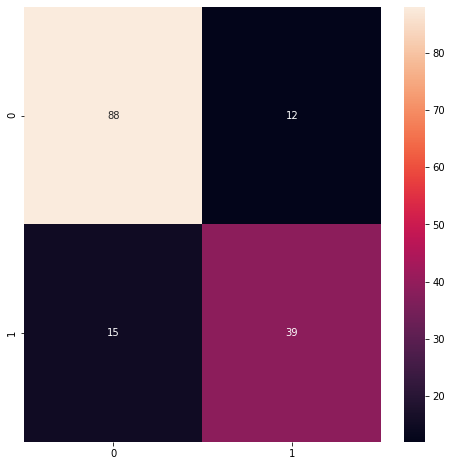

In [93]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

sns.heatmap(cf_matrix, annot=True)

In [94]:
# Print AUROC scores
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, y_pred_igs)
print('Logistic Regression: AUROC = %.3f' % (r_auc))

Logistic Regression: AUROC = 0.801


In [95]:
# Calculate ROC curve

r_fpr, r_tpr, _ = roc_curve(y_test, y_pred_igs)

# Plot the ROC curve

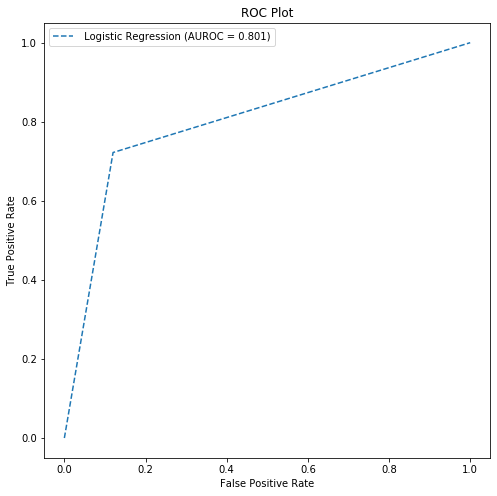

In [96]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label=' Logistic Regression (AUROC = %0.3f)' % r_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.rcParams["figure.figsize"] = (20,16)
plt.show()